In [318]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_files
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler,normalize
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split,KFold,GridSearchCV,cross_val_score

from sklearn.metrics import precision_score,accuracy_score,f1_score,recall_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,StackingClassifier

from sklearn.neighbors import KNeighborsClassifier

from sklearn.svm import SVC

In [414]:
data=pd.read_csv("E:\\NIIT\\Bitgrit\\Bird Species Classification Dataset\\Dataset\\training_set\\training_set.csv")
data

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,284
1,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,101
2,18.400000,NaN,200.000000,loc_3,3400.0,0.0,400
3,14.982114,47.504878,NaN,NaN,4800.0,0.0,98
4,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,103
...,...,...,...,...,...,...,...
430,17.000000,48.833824,196.000000,NaN,3500.0,1.0,45
431,17.100000,NaN,193.000000,loc_3,3400.0,0.0,398
432,19.400000,NaN,NaN,loc_1,3900.0,1.0,156
433,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,47


In [415]:
target=pd.read_csv("E:\\NIIT\\Bitgrit\\Bird Species Classification Dataset\\Dataset\\training_set\\training_target.csv")
target

,ID,species
0,284,C
1,101,C
2,400,B
3,98,C
4,103,C
...,...,...
430,45,B
431,398,A
432,156,A
433,47,B


In [417]:
target.sort_values("ID")

,ID,species
420,1,C
355,3,A
10,4,C
184,6,C
48,10,C
...,...,...
61,539,C
384,540,B
119,542,C
144,543,C


In [321]:
test_data=pd.read_csv("E:\\NIIT\\Bitgrit\\Bird Species Classification Dataset\\Dataset\\test_set\\test_set.csv")
test_result=pd.read_csv("E:\\NIIT\\Bitgrit\\Bird Species Classification Dataset\\Dataset\\solution_format.csv")

In [322]:
test_data

,bill_depth,bill_length,wing_length,location,mass,sex,ID
0,14.982114,38.259307,217.186992,loc_2,5400.0,0.0,2
1,13.200000,46.100000,211.000000,loc_2,4500.0,0.0,5
2,20.000000,NaN,197.000000,loc_3,3300.0,1.0,7
3,17.500000,38.791391,190.000000,loc_3,3900.0,NaN,8
4,18.900000,NaN,184.000000,loc_2,3550.0,1.0,9
...,...,...,...,...,...,...,...
104,19.000000,NaN,NaN,loc_1,3600.0,0.0,507
105,18.000000,NaN,210.000000,loc_1,4000.0,1.0,512
106,19.500000,49.000000,210.000000,loc_3,3950.0,1.0,516
107,17.900000,50.100000,190.000000,loc_3,3400.0,0.0,533


In [323]:
test_result

,ID,species
0,2,A
1,5,C
2,7,C
3,8,B
4,9,C
...,...,...
104,507,A
105,512,C
106,516,A
107,533,C


In [324]:
y_pred

array(['C', 'C', 'B', 'A', 'C', 'C', 'A', 'A', 'B', 'C', 'A', 'C', 'C',
       'C', 'C', 'C', 'C', 'C', 'C', 'B', 'B', 'C', 'C', 'B', 'B', 'C',
       'B', 'A', 'C', 'A', 'C', 'C', 'B', 'A', 'A', 'C', 'C', 'B', 'B',
       'B'], dtype=object)

## -----------------------------------------------------------------------------------------------------------------------------

In [325]:
df=data.merge(target)
df=df[["ID","bill_depth","bill_length","wing_length","location","mass","sex","species"]]
df

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,284,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,C
1,101,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,C
2,400,18.400000,NaN,200.000000,loc_3,3400.0,0.0,B
3,98,14.982114,47.504878,NaN,NaN,4800.0,0.0,C
4,103,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,C
...,...,...,...,...,...,...,...,...
430,45,17.000000,48.833824,196.000000,NaN,3500.0,1.0,B
431,398,17.100000,NaN,193.000000,loc_3,3400.0,0.0,A
432,156,19.400000,NaN,NaN,loc_1,3900.0,1.0,A
433,47,16.600000,55.512336,187.000000,loc_2,2900.0,NaN,B


In [326]:
test_df=test_data.merge(test_result)
test_df=test_df[["ID","bill_depth","bill_length","wing_length","location","mass","sex","species"]]
test_df

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,2,14.982114,38.259307,217.186992,loc_2,5400.0,0.0,A
1,5,13.200000,46.100000,211.000000,loc_2,4500.0,0.0,C
2,7,20.000000,NaN,197.000000,loc_3,3300.0,1.0,C
3,8,17.500000,38.791391,190.000000,loc_3,3900.0,NaN,B
4,9,18.900000,NaN,184.000000,loc_2,3550.0,1.0,C
...,...,...,...,...,...,...,...,...
104,507,19.000000,NaN,NaN,loc_1,3600.0,0.0,A
105,512,18.000000,NaN,210.000000,loc_1,4000.0,1.0,C
106,516,19.500000,49.000000,210.000000,loc_3,3950.0,1.0,A
107,533,17.900000,50.100000,190.000000,loc_3,3400.0,0.0,C


## ---------------------------------------------------------------------------------------------------------------------------

In [327]:
test_data.isnull().sum()

bill_depth      1
bill_length    41
wing_length    38
location        6
mass            1
sex            17
ID              0
dtype: int64

In [328]:
df.isnull().sum()

ID               0
bill_depth       1
bill_length    140
wing_length    137
location        30
mass             2
sex             56
species          0
dtype: int64

In [329]:
def fillnan(df,col):
    df[col].fillna(df[col].mean(),inplace=True)

In [330]:
fillnan(df,"bill_depth")
fillnan(df,"mass")

In [331]:
fillnan(test_df,"bill_depth")
fillnan(test_df,"mass")

In [332]:
def fillnan2(df,col):
    df[col].fillna(df[col].mode()[0],inplace=True)

In [333]:
fillnan2(df,"location")
fillnan2(df,"sex")

In [334]:
fillnan2(test_df,"location")
fillnan2(test_df,"sex")

In [335]:
# Imputing of bill_length and wing_length which have null values by random quantile 30 to 70.
def fillnan3(df,col):
    np.random.seed(35)
    list1=np.random.randint(30,70,size=len(df))
    j=0
    for i in list(df[df[col].isnull()==True].index):
        df[col][i]=df[col].quantile(list1[j]/100)
        j+=1

In [336]:
fillnan3(df,"bill_length")
fillnan3(df,"wing_length")

In [337]:
fillnan3(test_df,"bill_length")
fillnan3(test_df,"wing_length")

In [338]:
df.isnull().sum()

ID             0
bill_depth     0
bill_length    0
wing_length    0
location       0
mass           0
sex            0
species        0
dtype: int64

In [339]:
test_df.isnull().sum()

ID             0
bill_depth     0
bill_length    0
wing_length    0
location       0
mass           0
sex            0
species        0
dtype: int64

In [340]:
df

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,284,14.300000,48.200000,210.000000,loc_2,4600.0,0.0,C
1,101,14.400000,48.400000,203.000000,loc_2,4625.0,0.0,C
2,400,18.400000,45.500000,200.000000,loc_3,3400.0,0.0,B
3,98,14.982114,47.504878,196.000000,loc_2,4800.0,0.0,C
4,103,18.982114,38.259307,217.186992,loc_3,5200.0,0.0,C
...,...,...,...,...,...,...,...,...
430,45,17.000000,48.833824,196.000000,loc_2,3500.0,1.0,B
431,398,17.100000,47.504878,193.000000,loc_3,3400.0,0.0,A
432,156,19.400000,47.504878,198.000000,loc_1,3900.0,1.0,A
433,47,16.600000,55.512336,187.000000,loc_2,2900.0,1.0,B


In [341]:
test_df.reset_index(drop=True,inplace=True)

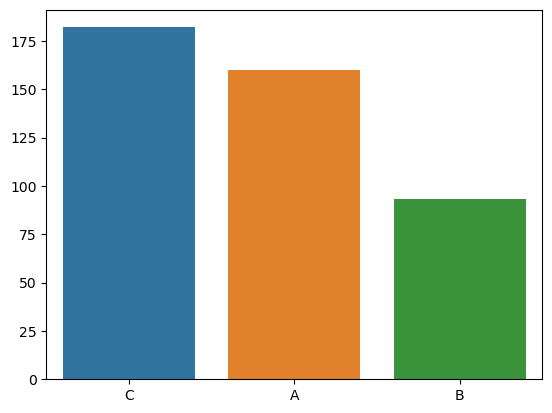

In [342]:
sns.barplot(df["species"].value_counts().index,df["species"].value_counts().values)
plt.show()

In [343]:
LE = LabelEncoder()
LE.fit(df["location"])
df["location"] = LE.transform(df["location"])
test_df["location"] = LE.transform(test_df["location"])

In [344]:
df

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,284,14.300000,48.200000,210.000000,1,4600.0,0.0,C
1,101,14.400000,48.400000,203.000000,1,4625.0,0.0,C
2,400,18.400000,45.500000,200.000000,2,3400.0,0.0,B
3,98,14.982114,47.504878,196.000000,1,4800.0,0.0,C
4,103,18.982114,38.259307,217.186992,2,5200.0,0.0,C
...,...,...,...,...,...,...,...,...
430,45,17.000000,48.833824,196.000000,1,3500.0,1.0,B
431,398,17.100000,47.504878,193.000000,2,3400.0,0.0,A
432,156,19.400000,47.504878,198.000000,0,3900.0,1.0,A
433,47,16.600000,55.512336,187.000000,1,2900.0,1.0,B


In [345]:
test_df

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,2,14.982114,38.259307,217.186992,1,5400.0,0.0,A
1,5,13.200000,46.100000,211.000000,1,4500.0,0.0,C
2,7,20.000000,45.326000,197.000000,2,3300.0,1.0,C
3,8,17.500000,38.791391,190.000000,2,3900.0,0.0,B
4,9,18.900000,46.160000,184.000000,1,3550.0,1.0,C
...,...,...,...,...,...,...,...,...
104,507,19.000000,45.908000,195.330176,0,3600.0,0.0,A
105,512,18.000000,46.200000,210.000000,0,4000.0,1.0,C
106,516,19.500000,49.000000,210.000000,2,3950.0,1.0,A
107,533,17.900000,50.100000,190.000000,2,3400.0,0.0,C


## Balancing data

In [346]:
A=df.drop(["species"],axis=1)
B=df["species"]

In [347]:
# Balancing data by oversampling.
sm=SMOTE(random_state=42)
A_bal,B_bal=sm.fit_resample(A,B)

In [348]:
balanced_data=A_bal.copy()
balanced_data["species"]=B_bal

In [349]:
balanced_data

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,284,14.300000,48.200000,210.000000,1,4600.000000,0.000000,C
1,101,14.400000,48.400000,203.000000,1,4625.000000,0.000000,C
2,400,18.400000,45.500000,200.000000,2,3400.000000,0.000000,B
3,98,14.982114,47.504878,196.000000,1,4800.000000,0.000000,C
4,103,18.982114,38.259307,217.186992,2,5200.000000,0.000000,C
...,...,...,...,...,...,...,...,...
541,482,16.686095,47.325861,199.504873,2,3337.621828,0.000000,B
542,119,17.768741,45.806673,193.249886,2,3310.938211,0.218764,B
543,491,18.804584,46.944054,199.674306,2,4005.810200,0.558102,B
544,116,17.180767,55.512336,191.211509,1,3585.095904,0.000000,B


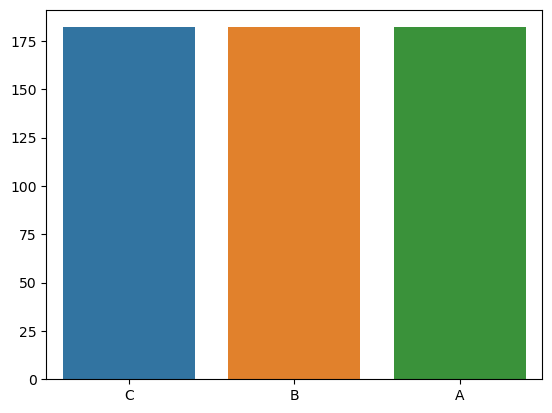

In [350]:
sns.barplot(balanced_data["species"].value_counts().index,balanced_data["species"].value_counts().values)
plt.show()

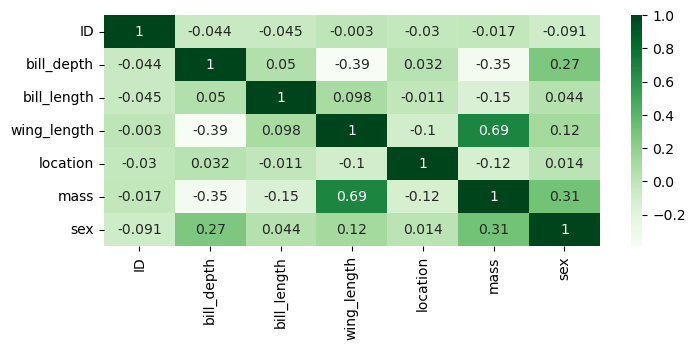

In [351]:
cm=balanced_data.corr()
plt.figure(figsize=(8,3))
sns.heatmap(cm,annot=True,cmap="Greens")
plt.show()

In [352]:
balanced_data

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,284,14.300000,48.200000,210.000000,1,4600.000000,0.000000,C
1,101,14.400000,48.400000,203.000000,1,4625.000000,0.000000,C
2,400,18.400000,45.500000,200.000000,2,3400.000000,0.000000,B
3,98,14.982114,47.504878,196.000000,1,4800.000000,0.000000,C
4,103,18.982114,38.259307,217.186992,2,5200.000000,0.000000,C
...,...,...,...,...,...,...,...,...
541,482,16.686095,47.325861,199.504873,2,3337.621828,0.000000,B
542,119,17.768741,45.806673,193.249886,2,3310.938211,0.218764,B
543,491,18.804584,46.944054,199.674306,2,4005.810200,0.558102,B
544,116,17.180767,55.512336,191.211509,1,3585.095904,0.000000,B


In [353]:
final=pd.concat([balanced_data,test_df],axis=0)
final=final.reset_index(drop=True)
final

,ID,bill_depth,bill_length,wing_length,location,mass,sex,species
0,284,14.300000,48.200000,210.000000,1,4600.0,0.0,C
1,101,14.400000,48.400000,203.000000,1,4625.0,0.0,C
2,400,18.400000,45.500000,200.000000,2,3400.0,0.0,B
3,98,14.982114,47.504878,196.000000,1,4800.0,0.0,C
4,103,18.982114,38.259307,217.186992,2,5200.0,0.0,C
...,...,...,...,...,...,...,...,...
650,507,19.000000,45.908000,195.330176,0,3600.0,0.0,A
651,512,18.000000,46.200000,210.000000,0,4000.0,1.0,C
652,516,19.500000,49.000000,210.000000,2,3950.0,1.0,A
653,533,17.900000,50.100000,190.000000,2,3400.0,0.0,C


In [354]:
C=final.drop(["species","ID"],axis=1)
D=final["species"]

In [355]:
scaler=StandardScaler()
scaler.fit(C)
scaled_x=pd.DataFrame(scaler.transform(C),columns=C.columns)

In [356]:
scaled_data=scaled_x.copy()
scaled_data["species"]=D
scaled_data

,bill_depth,bill_length,wing_length,location,mass,sex,species
0,-1.708798,0.349676,0.897819,-0.201242,0.538052,-1.092681,C
1,-1.654630,0.397325,0.253773,-0.201242,0.570240,-1.092681,C
2,0.512090,-0.293591,-0.022247,1.231514,-1.006999,-1.092681,B
3,-1.339311,0.184065,-0.390273,-0.201242,0.795560,-1.092681,C
4,0.827409,-2.018665,1.559069,1.231514,1.310577,-1.092681,C
...,...,...,...,...,...,...,...
650,0.837098,-0.196386,-0.451901,-1.633998,-0.749491,-1.092681,A
651,0.295418,-0.126818,0.897819,-1.633998,-0.234474,0.960868,C
652,1.107938,0.540273,0.897819,1.231514,-0.298851,0.960868,A
653,0.241250,0.802345,-0.942313,1.231514,-1.006999,-1.092681,C


In [390]:
train_data=scaled_data[:546]
test_data=scaled_data[546:].reset_index(drop=True)

In [391]:
x_train=train_data.drop(["species"],axis=1)
y_train=train_data["species"]

In [392]:
x_test=test_data.drop(["species"],axis=1)
y_test=test_data["species"]

## Data Validation

In [393]:
kf=KFold(n_splits=5,shuffle=True, random_state=42)

In [394]:
test_data

,bill_depth,bill_length,wing_length,location,mass,sex,species
0,-1.339311,-2.018665,1.559069,-0.201242,1.568086,-1.092681,A
1,-2.304647,-0.150643,0.989825,-0.201242,0.409297,-1.092681,C
2,1.378778,-0.335046,-0.298267,1.231514,-1.135754,0.960868,C
3,0.024578,-1.891897,-0.942313,1.231514,-0.363228,-1.092681,B
4,0.782930,-0.136348,-1.494352,-0.201242,-0.813868,0.960868,C
...,...,...,...,...,...,...,...
104,0.837098,-0.196386,-0.451901,-1.633998,-0.749491,-1.092681,A
105,0.295418,-0.126818,0.897819,-1.633998,-0.234474,0.960868,C
106,1.107938,0.540273,0.897819,1.231514,-0.298851,0.960868,A
107,0.241250,0.802345,-0.942313,1.231514,-1.006999,-1.092681,C


## Model Creation

In [395]:
log_model=LogisticRegression(multi_class='multinomial').fit(x_train,y_train)
y_pred=log_model.predict(x_test)

In [396]:
dt_score=cross_val_score(log_model,x_train,y_train,scoring="accuracy",cv=kf)
dt_score

array([0.84545455, 0.83486239, 0.7706422 , 0.88073394, 0.81651376])

In [397]:
dt_score=cross_val_score(log_model,x_test,y_test,scoring="accuracy",cv=kf)
dt_score

array([0.45454545, 0.31818182, 0.36363636, 0.31818182, 0.14285714])

In [398]:
log_model.score(x_test,y_test)

0.3669724770642202

## Naive Baye's classifier

In [399]:
gss_model=GaussianNB().fit(x_train,y_train)
y_pred=gss_model.predict(x_test)

In [400]:
gss_score=cross_val_score(gss_model,x_train,y_train,scoring="accuracy",cv=kf)
gss_score

array([0.85454545, 0.86238532, 0.78899083, 0.85321101, 0.85321101])

In [401]:
gss_score=cross_val_score(gss_model,x_test,y_test,scoring="accuracy",cv=kf)
gss_score

array([0.31818182, 0.36363636, 0.31818182, 0.27272727, 0.23809524])

In [402]:
gss_model.score(x_train,y_train)

0.8608058608058609

In [403]:
gss_model.score(x_test,y_test)

0.3486238532110092

## Decision tree classifier

In [404]:
param_grid={'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(10,101,20),
           'max_depth':np.arange(3,10)}

In [405]:
dt=DecisionTreeClassifier()

In [406]:
grid_cv=GridSearchCV(dt,param_grid,scoring="accuracy",cv=kf)

In [407]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([10, 30, 50, 70, 90]),
                         'min_samples_split': array([10, 20, 30, 40, 50])},
             scoring='accuracy')

In [408]:
grid_cv.best_estimator_

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=10)

In [409]:
dt_model=DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=10).fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

In [377]:
dt_score=cross_val_score(dt_model,x_train,y_train,scoring="accuracy",cv=kf)
dt_score

array([0.91818182, 0.82568807, 0.8440367 , 0.86238532, 0.89908257])

In [378]:
dt_score=cross_val_score(dt_model,x_test,y_test,scoring="accuracy",cv=kf)
dt_score

array([0.22727273, 0.27272727, 0.27272727, 0.22727273, 0.22727273])

In [379]:
dt_model.score(x_train,y_train)

0.9157509157509157

In [380]:
dt_model.score(x_test,y_test)

0.32727272727272727

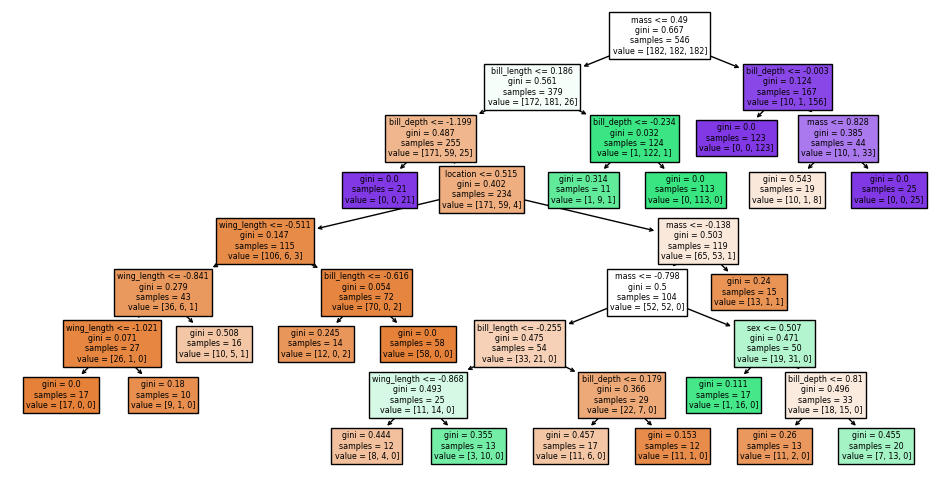

In [381]:
plt.figure(figsize=(12,6))
tree.plot_tree(dt_model,feature_names=scaled_x.columns,filled=True)
plt.show()

In [412]:
pred_df=pd.DataFrame(y_pred)
pred_df

,0
0,C
1,C
2,B
3,B
4,A
...,...
104,A
105,A
106,B
107,B


In [413]:
pred_df.to_csv('pred_df.csv',index=False)

In [382]:
y_pred

array(['B', 'C', 'C', 'B', 'B', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'B',
       'C', 'A', 'A', 'B', 'A', 'A', 'A', 'C', 'A', 'B', 'C', 'B', 'C',
       'C', 'A', 'C', 'A', 'C', 'C', 'B', 'C', 'A', 'A', 'B', 'C', 'C',
       'C', 'A', 'A', 'C', 'B', 'A', 'C', 'C', 'B', 'B', 'A', 'C', 'A',
       'C', 'A', 'B', 'B', 'B', 'A', 'C', 'B', 'A', 'A', 'B', 'C', 'A',
       'A', 'A', 'B', 'A', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'A', 'C',
       'C', 'A', 'A', 'A', 'B', 'A', 'C', 'A', 'A', 'C', 'A', 'A', 'C',
       'A', 'A', 'C', 'C', 'A', 'A', 'C', 'C', 'C', 'A', 'A', 'C', 'A',
       'A', 'A', 'A', 'B', 'B', 'C'], dtype=object)

## Random forest classifier

In [137]:
param_grid={'n_estimators':np.arange(20,101,20),
           'min_samples_split':np.arange(10,51,10),
           'min_samples_leaf':np.arange(3,10),
           'max_depth':np.arange(3,10)}

In [138]:
rf=RandomForestClassifier()

In [139]:
grid_cv=GridSearchCV(rf,param_grid,scoring="accuracy",cv=kf)

In [140]:
grid_cv.fit(x_train,y_train)

KeyboardInterrupt: 

In [158]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=80)

In [159]:
rf_model=RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=80,random_state=42).fit(x_train,y_train)
y_pred=rf_model.predict(x_test)

In [133]:
dt_score=cross_val_score(dt_model,x_train,y_train,scoring="accuracy",cv=kf)
dt_score

array([0.91818182, 0.82568807, 0.8440367 , 0.86238532, 0.89908257])

In [134]:
dt_score=cross_val_score(dt_model,x_test,y_test,scoring="accuracy",cv=kf)
dt_score

array([0.22727273, 0.27272727, 0.27272727, 0.22727273, 0.22727273])

In [135]:
dt_model.score(x_train,y_train)

0.9157509157509157

In [136]:
dt_model.score(x_test,y_test)

0.32727272727272727

## Adaboost classifier

In [127]:
param_grid={"n_estimators": np.arange(10,101,10),
           "learning_rate":np.arange(0.05,1,0.05)}

In [128]:
ada=AdaBoostClassifier()

In [129]:
grid_cv=GridSearchCV(ada,param_grid,scoring="accuracy",cv=kf)

In [130]:
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95]),
                         'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])},
             scoring='accuracy')

In [131]:
grid_cv.best_estimator_

AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=80)

In [132]:
ada_model=AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=80,random_state=42).fit(x_train,y_train)
y_pred=ada_model.predict(x_test)

In [133]:
metrics_print1(ada_model)

Model accuracy score on training data : 0.8832951945080092
Model accuracy score on test data : 0.8623853211009175

Model precision_score : 0.8680057388809183
Model recall_score : 0.8662036649652749
Model f1_score: 0.865552203787498




## K-Nearest Neighbors

In [138]:
accuracy_scores=[]
for k in range(5,30):
    knn_score=cross_val_score(KNeighborsClassifier(k),x_train,y_train,scoring="accuracy",cv=kf)
    accuracy_scores.append(np.mean(knn_score))

In [140]:
for k in range(5,30):
    print("number of neighbors:",k,":",round(accuracy_scores[k-5],4))

number of neighbors: 5 : 0.8443
number of neighbors: 6 : 0.8215
number of neighbors: 7 : 0.8329
number of neighbors: 8 : 0.8306
number of neighbors: 9 : 0.8398
number of neighbors: 10 : 0.8215
number of neighbors: 11 : 0.8444
number of neighbors: 12 : 0.8261
number of neighbors: 13 : 0.8421
number of neighbors: 14 : 0.8376
number of neighbors: 15 : 0.8536
number of neighbors: 16 : 0.8399
number of neighbors: 17 : 0.8445
number of neighbors: 18 : 0.8216
number of neighbors: 19 : 0.8375
number of neighbors: 20 : 0.8215
number of neighbors: 21 : 0.8398
number of neighbors: 22 : 0.8398
number of neighbors: 23 : 0.8444
number of neighbors: 24 : 0.8467
number of neighbors: 25 : 0.849
number of neighbors: 26 : 0.8398
number of neighbors: 27 : 0.8398
number of neighbors: 28 : 0.833
number of neighbors: 29 : 0.8353


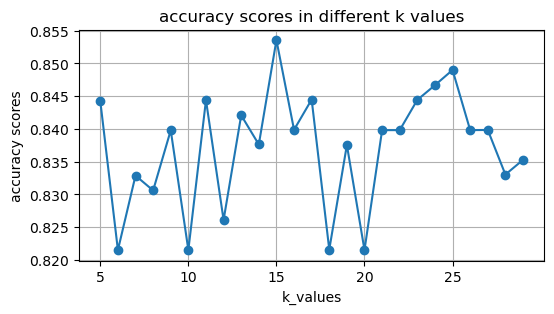

In [141]:
plt.figure(figsize=(6,3))
plt.plot(range(5,30),accuracy_scores,marker="o")
plt.ylabel("accuracy scores")
plt.xlabel("k_values")
plt.title("accuracy scores in different k values")
plt.xticks(range(5,30,5))
plt.grid()
plt.show()

In [152]:
k=15
knn_model=KNeighborsClassifier(k).fit(x_train,y_train)
y_pred=knn_model.predict(x_test)

In [153]:
metrics_print1(knn_model)

Model accuracy score on training data : 0.8810068649885584
Model accuracy score on test data : 0.908256880733945

Model precision_score : 0.914141414141414
Model recall_score : 0.9106211474632527
Model f1_score: 0.9107142857142857




## Stacked Classifier

In [161]:
level1=[]
level1.append(("lr",LogisticRegression()))
level1.append(("gss",GaussianNB()))
level1.append(("dt",DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)))
level1.append(("rf",RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=10,
                       n_estimators=80,random_state=42)))
level1.append(("ada",AdaBoostClassifier(learning_rate=0.7000000000000001, n_estimators=80,random_state=42)))
level1.append(("knn",KNeighborsClassifier(15)))
level1.append(("svm",SVC()))

level2=LogisticRegression()

In [162]:
stack_model=StackingClassifier(estimators=level1,final_estimator=level2,cv=kf).fit(x_train,y_train)
y_pred=stack_model.predict(x_test)

In [163]:
metrics_print1(stack_model)

Model accuracy score on training data : 0.9427917620137299
Model accuracy score on test data : 0.8990825688073395

Model precision_score : 0.906734496124031
Model recall_score : 0.9016121384542437
Model f1_score: 0.9015924136697082




## Best Model Selection

In [164]:
model_list=["Logistic Regression","Gaussian Model","Decision Tree classifier","Random Forest classifier","Ada-boost classifier","KNN classifier","Stacked classifier"]
metric_list=["Models","Accuracy(train)","Accuracy(test)","Precision","Recall","F1 score"]

In [165]:
final_results=pd.DataFrame()
for i in range(0,len(model_list)):
    x=[[model_list[i],accuracy_train[i],accuracy_test[i],precision[i],recall[i],f1_scores[i]]]
    new=pd.DataFrame(x)
    final_results=pd.concat([final_results,new],axis=0)
final_results.columns=metric_list
final_results=final_results.reset_index(drop=True)  
final_results

,Models,Accuracy(train),Accuracy(test),Precision,Recall,F1 score
0,Logistic Regression,0.850725,0.827807,0.827494,0.830879,0.826480
1,Gaussian Model,0.862638,0.844270,0.847769,0.844599,0.843987
2,Decision Tree classifier,0.922197,0.908257,0.913124,0.909826,0.910754
3,Random Forest classifier,0.885584,0.889908,0.897887,0.892366,0.889220
4,Ada-boost classifier,0.883295,0.862385,0.868006,0.866204,0.865552
5,KNN classifier,0.881007,0.908257,0.914141,0.910621,0.910714
6,Stacked classifier,0.938215,0.899083,0.902422,0.902086,0.902153


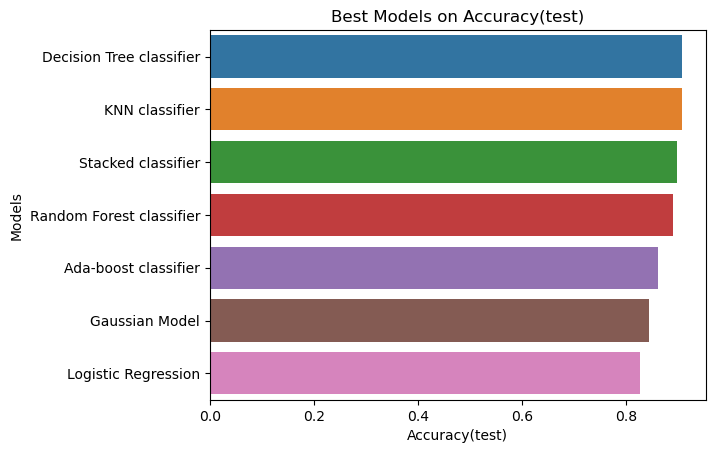

In [166]:
results=final_results.sort_values("Accuracy(test)",ascending=False)
sns.barplot(x="Accuracy(test)",y="Models",data=results)
plt.title("Best Models on Accuracy(test)")
plt.show()

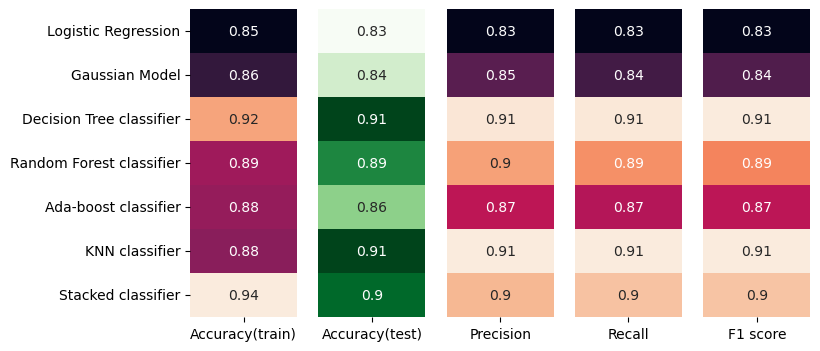

In [167]:
fig,ax=plt.subplots(1,5,figsize=(8,4))

sns.heatmap(final_results[["Accuracy(train)"]],annot=True,yticklabels=model_list,ax=ax[0],cbar=False)
sns.heatmap(final_results[["Accuracy(test)"]],annot=True,ax=ax[1],yticklabels=False,cbar=False,cmap="Greens")
sns.heatmap(final_results[["Precision"]],annot=True,ax=ax[2],yticklabels=False,cbar=False)
sns.heatmap(final_results[["Recall"]],annot=True,ax=ax[3],yticklabels=False,cbar=False)
sns.heatmap(final_results[["F1 score"]],annot=True,ax=ax[4],yticklabels=False,cbar=False)
plt.show()